# Superstore Sales Analysis

By Ngoc Huyen Trang Nguyen (Talia)

#### Problem Statement
- The Superstore dataset provides sales and profit data for a variety of products across different categories.
- The goal of this project is to analyze the data and identify insights that can help the company improve its business performance.
- Specifically, we aim to answer questions such as: What is the distribution of sales across different product categories? Is there a correlation between the size of products and the quantity sold? What are the most profitable products? Which product categories are the most profitable?
- By answering these questions, we hope to provide recommendations for the company on how to enhance the overall performance of sales. This analysis can help the company make informed decisions to improve customer satisfaction, increase sales, and maximize operational efficiency.

#### Assumptions
- The data in the dataset is accurate and has been cleaned and preprocessed prior to analysis.
- Representativeness of Data: The Sale Report dataset is assumed to provide a representative sample of all sales transactions during the specified time period covered by the dataset.
- Time Period Coverage: The dataset is assumed to cover a sufficient time period to allow for the identification of trends or patterns in sales and profitability in sales. This assumption implies that the dataset provides a comprehensive overview of pizza sales over the designated timeframe.
- Absence of Outliers or Anomalies: The dataset is not impacted by any significant outliers or anomalies that could skew the results of any analysis conducted on the dataset.

#### Research
Sales Performance Analysis:
- Total sales, profit, and quantity sold over time (daily, monthly, yearly).
- Sales trends by different categories, sub-categories, and products.
- Top-performing products and categories based on sales and profit.

Customer Analysis:
- Customer segmentation based on purchase behavior (e.g., frequency, average order value).
- Identifying top customers and their purchasing patterns.
- Customer lifetime value calculation.

Geographical Analysis:
- Sales distribution across different regions, states, and cities.
- Identifying high and low performing regions.
- Regional sales trends over time.

Product Analysis:
- Profitability analysis of different products.
- Impact of discounts on sales and profit.
- Inventory management insights (e.g., high demand products).

Shipping Analysis:
- Analysis of shipping modes and their impact on delivery time and customer satisfaction.
- Correlation between shipping mode and profit margins.

Time Series Analysis:
- Seasonal trends in sales and profit.
- Forecasting future sales based on historical data.

Discount Impact Analysis:
- Effect of discount rates on sales volume and profit margins.
- Optimal discount rates for maximizing profit.

Operational Efficiency:
- Order processing time from order date to ship date.
- Identifying bottlenecks in order fulfillment.

# Execution

In [311]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
file_path = '/Users/taliaveils/Documents/Superstore.csv'
df = pd.read_csv(file_path, encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32


In [313]:
pd.set_option('display.float_format', lambda x:['%.2f' % x])

#### Explore the data
1. Shape of the dataset

In [314]:
df.shape

(9994, 21)

2. Display top 5 rows

In [315]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


3. Display the last 5 rows

In [316]:
df.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.00,72.95


4. Get information about the data first

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

5. Check null values in the dataset

In [318]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

6. Check the duplicate 

In [319]:
df.duplicated().any()

False

--> no data duplicated

7. Get the statistic data

In [320]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,55190.38,229.86,3.79,0.16,28.66
std,2885.16,32063.69,623.25,2.23,0.21,234.26
min,1.00,1040.00,0.44,1.00,0.00,-6599.98
25%,2499.25,23223.00,17.28,2.00,0.00,1.73
50%,4997.50,56430.50,54.49,3.00,0.20,8.67
75%,7495.75,90008.00,209.94,5.00,0.20,29.36
max,9994.00,99301.00,22638.48,14.00,0.80,8399.98


#### Research answer

Total sales, profit, and quantity sold over time (daily, monthly, and yearly)

In [321]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [322]:
daily_sales = df.groupby(df['Order Date'].dt.date).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
})
daily_sales

,Sales,Profit,Quantity
Order Date,,,
2014-01-03,16.45,5.55,2
2014-01-04,288.06,-65.99,8
2014-01-05,19.54,4.88,3
2014-01-06,4407.10,1358.05,30
2014-01-07,87.16,-71.96,10
...,...,...,...
2017-12-26,814.59,61.12,12
2017-12-27,177.64,-31.97,6
2017-12-28,1657.35,253.12,64


In [323]:
monthly_sales = df.groupby(df['Order Date'].dt.month).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
})
monthly_sales

,Sales,Profit,Quantity
Order Date,,,
1,94924.84,9134.45,1475
2,59751.25,10294.61,1067
3,205005.49,28594.69,2564
4,137762.13,11587.44,2447
5,155028.81,22411.31,2791
6,152718.68,21285.80,2680
7,147238.10,13832.66,2705
8,159044.06,21776.94,2784
9,307649.95,36857.48,5062


In [324]:
yearly_sales = df.groupby(df['Order Date'].dt.year).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
})
yearly_sales

,Sales,Profit,Quantity
Order Date,,,
2014,484247.50,49543.97,7581
2015,470532.51,61618.60,7979
2016,609205.60,81795.17,9837
2017,733215.26,93439.27,12476


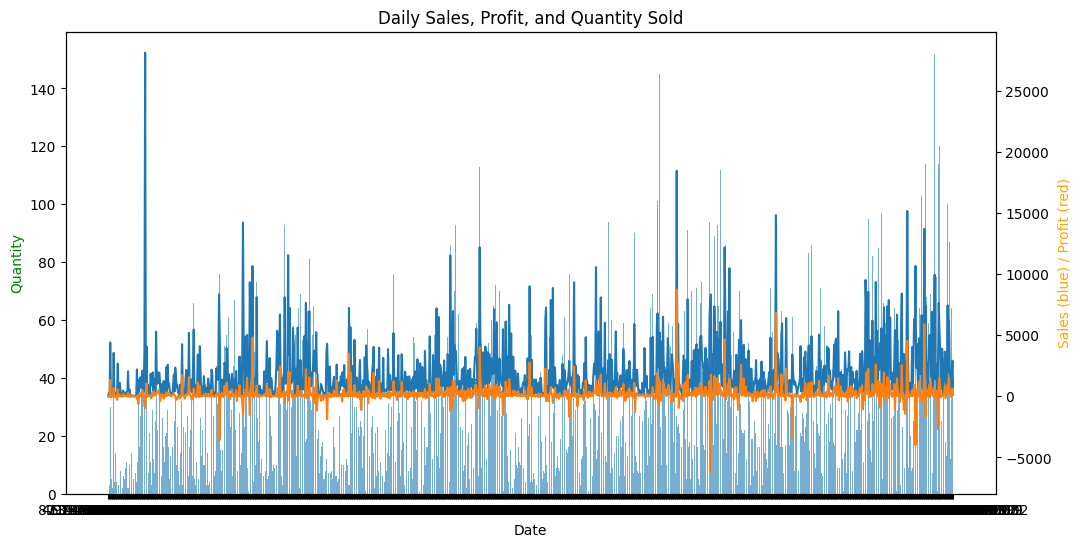

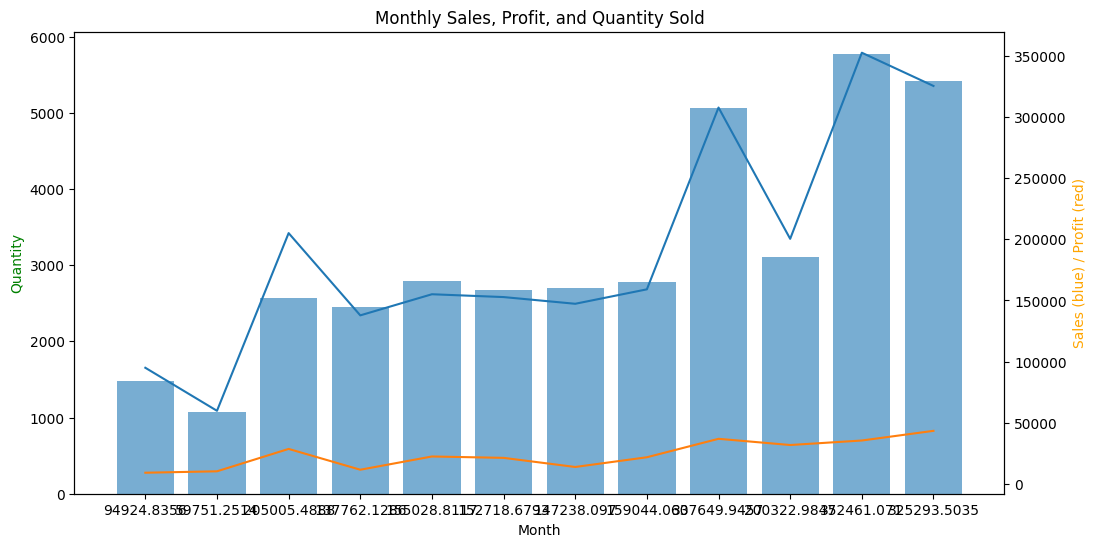

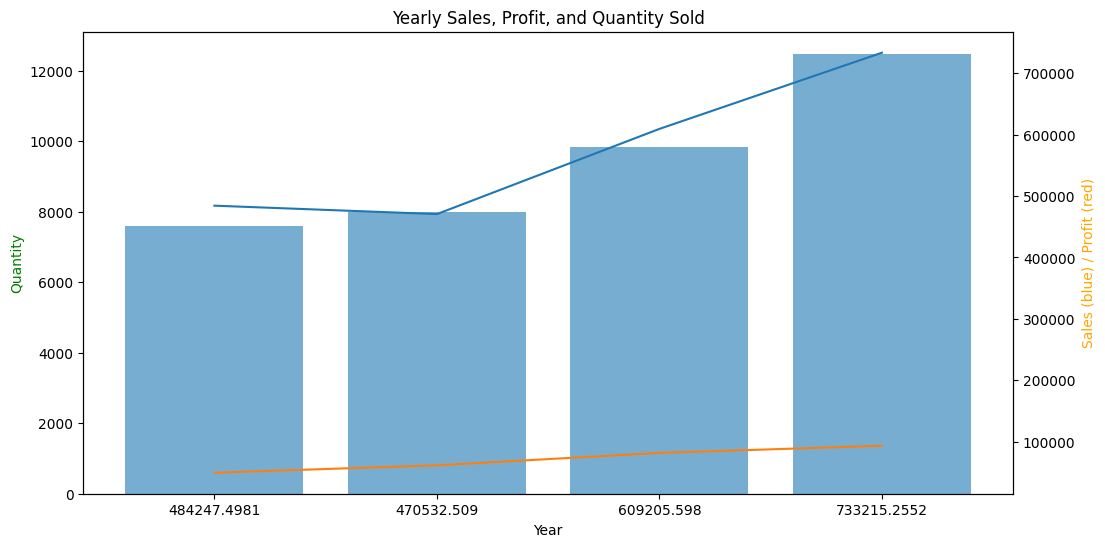

In [337]:
import matplotlib.pyplot as plt

# Plotting function
def plot_aggregated_data(df, title, x_label):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax2 = ax1.twinx()
    ax1.bar(df.iloc[:, 0].astype(str), df['Quantity'], alpha=0.6)
    ax2.plot(df.iloc[:, 0].astype(str), df['Sales'])
    ax2.plot(df.iloc[:, 0].astype(str), df['Profit'])

    ax1.set_xlabel(x_label)
    ax1.set_ylabel('Quantity', color='g')
    ax2.set_ylabel('Sales (blue) / Profit (red)', color='orange')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Daily sales plot
plot_aggregated_data(daily_sales, 'Daily Sales, Profit, and Quantity Sold', 'Date')

# Monthly sales plot
plot_aggregated_data(monthly_sales, 'Monthly Sales, Profit, and Quantity Sold', 'Month')

# Yearly sales plot
plot_aggregated_data(yearly_sales, 'Yearly Sales, Profit, and Quantity Sold', 'Year')


1. What is the distribution of sales across different product categories over time?

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
import seaborn as sns

In [ ]:
pip install --upgrade plotly


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [346]:
import plotly.graph_objects as go

# Aggregating data by category for sales
sales_category = df.groupby(['Category'], as_index=False).agg({
    'Sales': 'sum',
})

# Aggregating data by category for profit
profit_category = df.groupby(['Category'], as_index=False).agg({
    'Profit': 'sum'
})

# Merge the sales and profit dataframes
sales_profit_category = pd.merge(sales_category, profit_category, on='Category')

# Define the color palette from Plotly
color_palette = ['#2A629A', '#3ABEF9']  # Using Plotly compatible colors

# Create the figure
fig = go.Figure()

# Adding bar traces for Sales and Profit
fig.add_trace(go.Bar(x=sales_profit_category['Category'], 
                     y=sales_profit_category['Sales'], 
                     name='Sales',
                     marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_category['Category'], 
                     y=sales_profit_category['Profit'], 
                     name='Profit',
                     marker_color=color_palette[1]))

# Updating layout
fig.update_layout(title='Sales and Profit Analysis by Category',
                  xaxis_title='Category', 
                  yaxis_title='Amount',
                  barmode='group')  # Group bars together

# Show the figure
fig.show()


Customer Analysis:

- Customer segmentation based on purchase behavior (e.g., frequency, average order value).

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df['Customer ID'] = df['Customer ID']
print(df['Customer ID'])

0       CG-12520
1       CG-12520
2       DV-13045
3       SO-20335
4       SO-20335
          ...   
9989    TB-21400
9990    DB-13060
9991    DB-13060
9992    DB-13060
9993    CC-12220
Name: Customer ID, Length: 9994, dtype: object


In [ ]:
snapshot_date = max(df['Order Date']) + pd.DateOffset(days=1)

In [ ]:
df['Total Sales'] = df['Sales'] * df['Quantity']

In [ ]:
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'nunique',
    'Total Sales': 'sum'
})

In [ ]:
rfm.rename(columns={'Order Date': 'Recency', 'Order ID': 'Frequency', 'Total Sales': 'MonetaryValue'}, inplace=True)
rfm.head()

,Recency,Frequency,MonetaryValue
Customer ID,,,
AA-10315,185,5,16073.34
AA-10375,20,9,2734.83
AA-10480,260,4,5493.94
AA-10645,56,6,22927.85
AB-10015,416,3,1984.48


In [ ]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,793.00,793.00,793.00
mean,147.80,6.32,14486.84
std,186.21,2.55,15440.52
min,1.00,1.00,10.45
25%,31.00,5.00,4768.01
50%,76.00,6.00,9974.65
75%,184.00,8.00,18527.65
max,1166.00,17.00,146749.77


In [ ]:
import pandas as pd
import numpy as np

# Example custom bins (define your bins as needed)
recency_bins = [0, 30, 60, 90, 120, 180]  # Ensure these are monotonically increasing
frequency_bins = [0, 1, 2, 5, 10, 20]  # Ensure these are monotonically increasing
monetary_bins = [0, 50, 100, 200, 500, 1000]  # Ensure these are monotonically increasing

# Sample RFM DataFrame
# For illustration, creating a sample RFM DataFrame
data = {
    'Recency': [10, 40, 70, 100, 130, 160],
    'Frequency': [1, 3, 2, 8, 6, 15],
    'MonetaryValue': [20, 75, 150, 250, 400, 900]
}
rfm = pd.DataFrame(data)

# Calculate Recency score based on custom bins
rfm['R_Score'] = pd.cut(rfm['Recency'], bins=recency_bins, labels=range(1, 6), include_lowest=True)

# Reverse the Recency scores so that higher values indicate more recent purchases
rfm['R_Score'] = 5 - rfm['R_Score'].astype(int) + 1

# Calculate Frequency and Monetary scores based on custom bins
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=range(1, 6), include_lowest=True).astype(int)
rfm['M_Score'] = pd.cut(rfm['MonetaryValue'], bins=monetary_bins, labels=range(1, 6), include_lowest=True).astype(int)

# Check the RFM scores
print(rfm[['Recency', 'R_Score', 'Frequency', 'F_Score', 'MonetaryValue', 'M_Score']])


   Recency  R_Score  Frequency  F_Score  MonetaryValue  M_Score
0       10        5          1        1             20        1
1       40        4          3        3             75        2
2       70        3          2        2            150        3
3      100        2          8        4            250        4
4      130        1          6        4            400        4
5      160        1         15        5            900        5


In [ ]:
# Extract RFM scores for K-means clustering
X = rfm[['R_Score', 'F_Score', 'M_Score']]

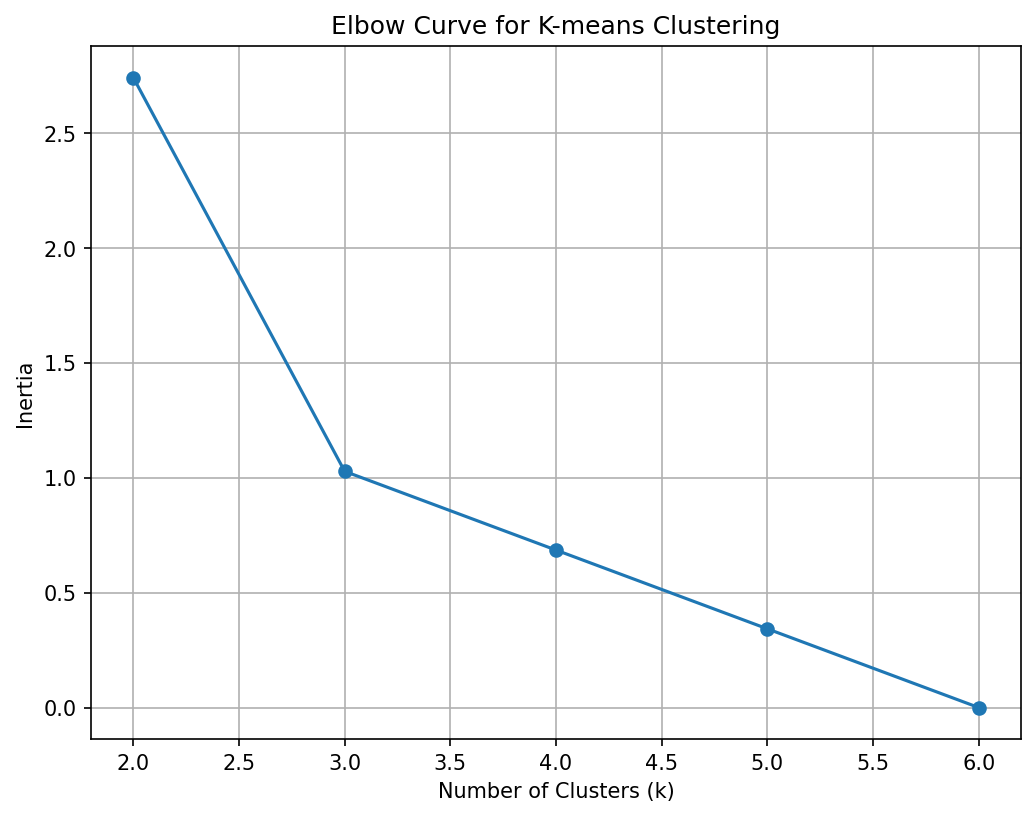

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample data creation for demonstration purposes
# Replace this with your actual data loading step
data = {
    'Feature1': [10, 20, 30, 40, 50, 60],
    'Feature2': [15, 25, 35, 45, 55, 65]
}
df = pd.DataFrame(data)

# Extracting features
X = df[['Feature1', 'Feature2']].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate inertia (sum of squared distances) for different values of k
inertia = []
max_k = min(10, len(X_scaled))  # Ensure max_k does not exceed number of samples
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(range(2, max_k + 1), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()


Geographical Analysis:

- Sales distribution across different regions, states, and cities.
- Identifying high and low performing regions.
- Regional sales trends over time.

Product Analysis:
- Profitability analysis of different products.
- Impact of discounts on sales and profit.
- Inventory management insights (e.g., high demand products).

Shipping Analysis:
- Analysis of shipping modes and their impact on delivery time and customer satisfaction.
- Correlation between shipping mode and profit margins.

Time Series Analysis:
- Seasonal trends in sales and profit.
- Forecasting future sales based on historical data.

Discount Impact Analysis:
- Effect of discount rates on sales volume and profit margins.
- Optimal discount rates for maximizing profit.

Operational Efficiency:
- Order processing time from order date to ship date.
- Identifying bottlenecks in order fulfillment.